In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("country_wise_latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [3]:
# Basic Data Overview

print("Shape of the dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())

Shape of the dataset: (187, 15)

Columns:
 Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

Missing values:
 Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

First 5 rows:
   Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Alban

In [4]:
#  Totals
total_confirmed = df['Confirmed'].sum()
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()
total_active = df['Active'].sum()

# Print totals
print("Total Confirmed Cases:", total_confirmed)
print("Total Deaths:", total_deaths)
print("Total Recovered:", total_recovered)
print("Total Active Cases:", total_active)

Total Confirmed Cases: 16480485
Total Deaths: 654036
Total Recovered: 9468087
Total Active Cases: 6358362


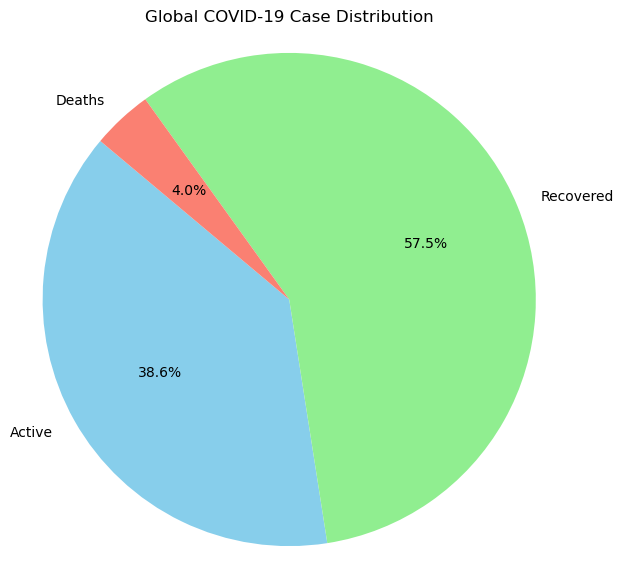

In [5]:
#  Pie Chart: Distribution of Outcomes
labels = ['Active', 'Recovered', 'Deaths']
sizes = [total_active, total_recovered, total_deaths]
colors = ['skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Global COVID-19 Case Distribution')
plt.axis('equal')
plt.show()

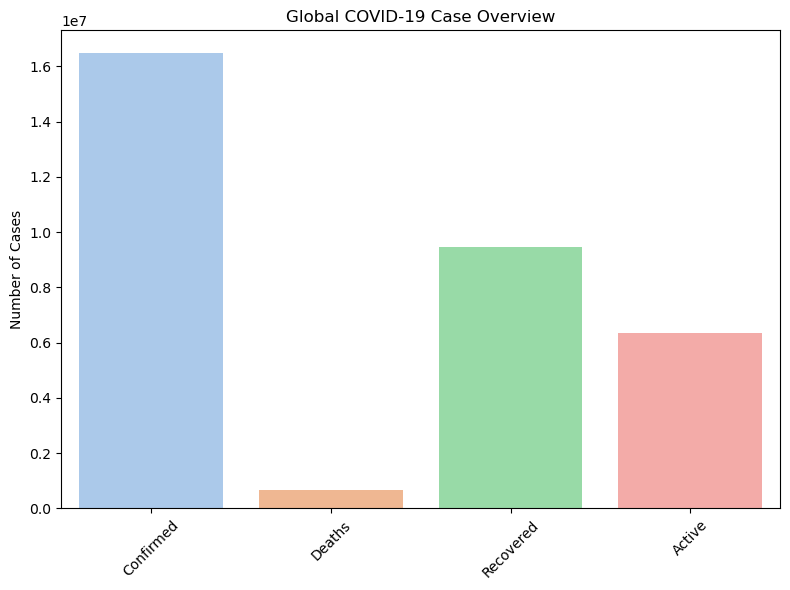

In [6]:
#  Bar Plot: Comparing Totals
totals = {
    'Confirmed': total_confirmed,
    'Deaths': total_deaths,
    'Recovered': total_recovered,
    'Active': total_active
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(totals.keys()), y=list(totals.values()), palette='pastel')
plt.title('Global COVID-19 Case Overview')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# EDA Process 
# Top 10 Countries by Metrics

top_n = 10
top_confirmed = df.nlargest(top_n, 'Confirmed')
top_deaths = df.nlargest(top_n, 'Deaths')
top_active = df.nlargest(top_n, 'Active')

In [8]:
top_confirmed

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


## countries that gets badly affected by corona


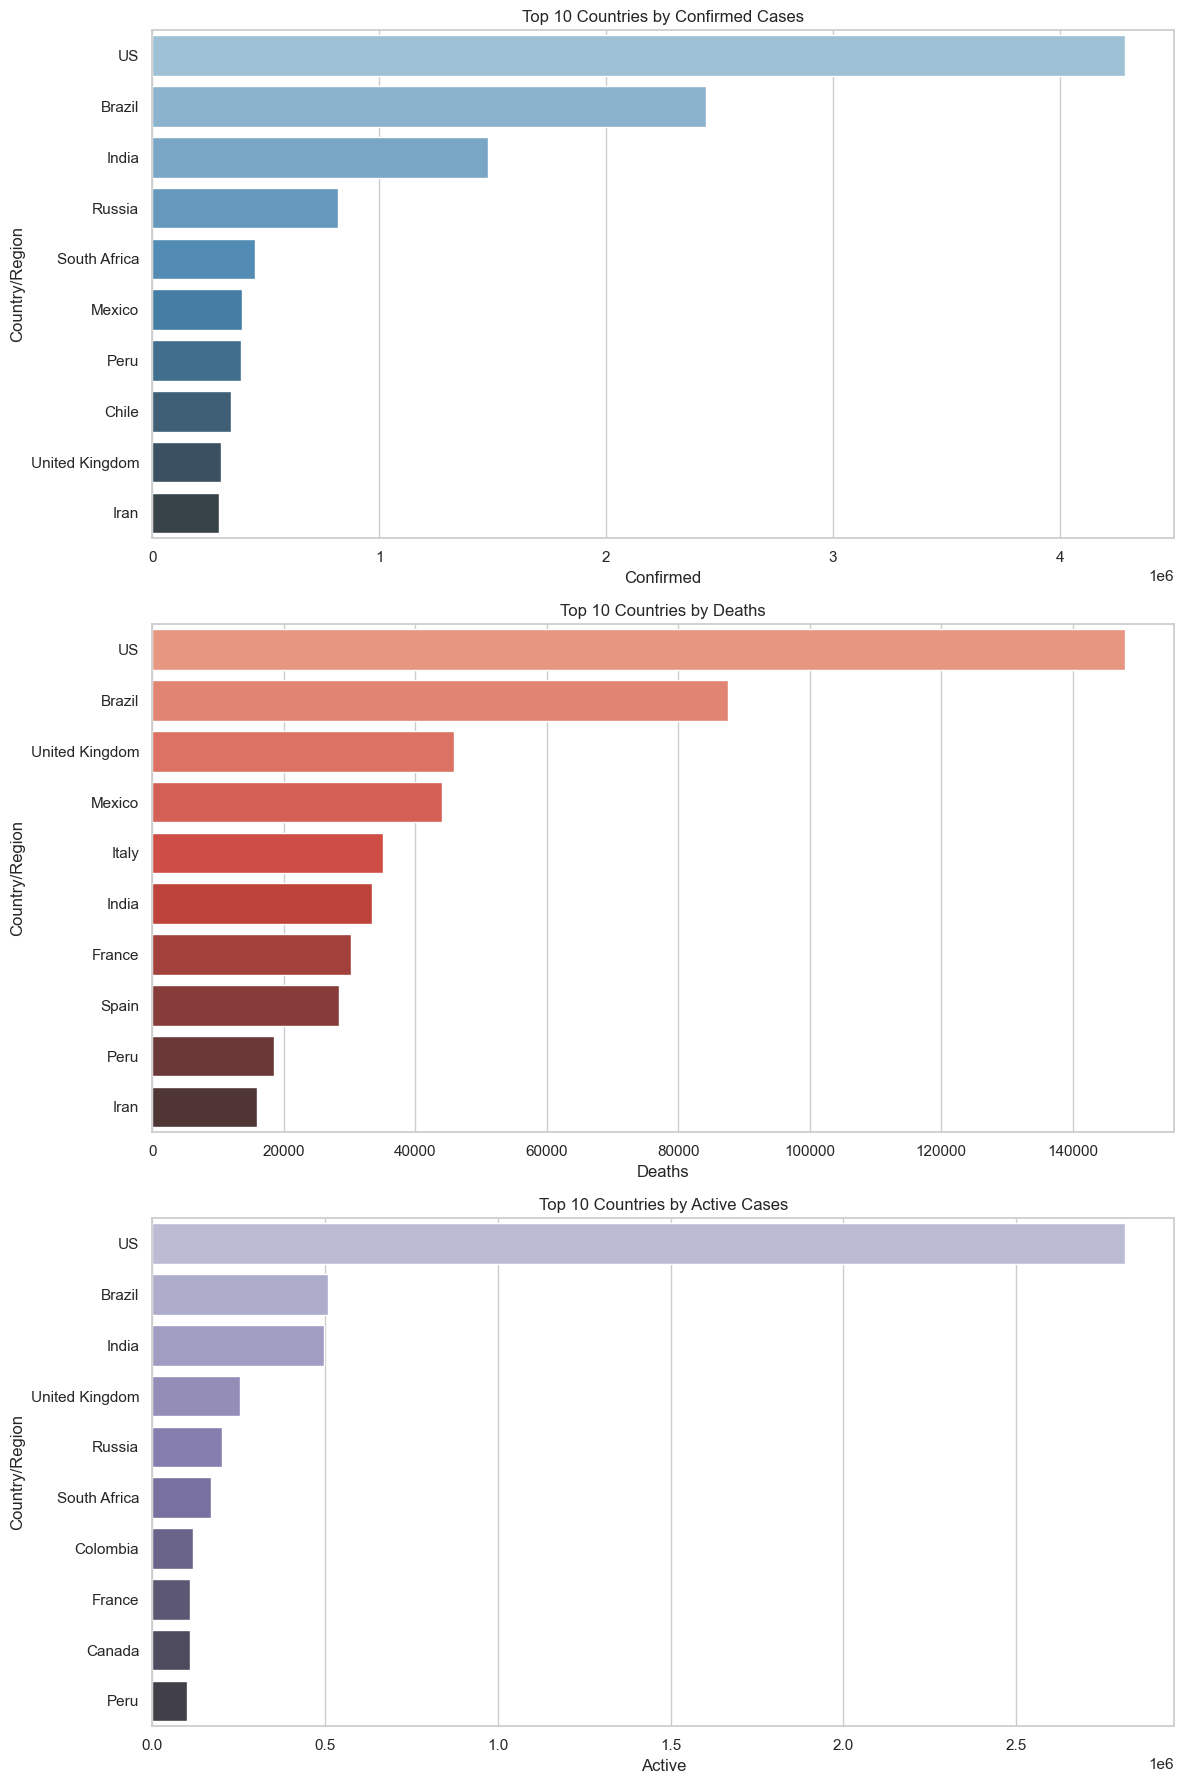

In [9]:
# Visualize Top Countries

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Top Confirmed
sns.barplot(data=top_confirmed, x='Confirmed', y='Country/Region', ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Countries by Confirmed Cases')

# Top Deaths
sns.barplot(data=top_deaths, x='Deaths', y='Country/Region', ax=axes[1], palette='Reds_d')
axes[1].set_title('Top 10 Countries by Deaths')

# Top Active
sns.barplot(data=top_active, x='Active', y='Country/Region', ax=axes[2], palette='Purples_d')
axes[2].set_title('Top 10 Countries by Active Cases')

plt.tight_layout()
plt.show()


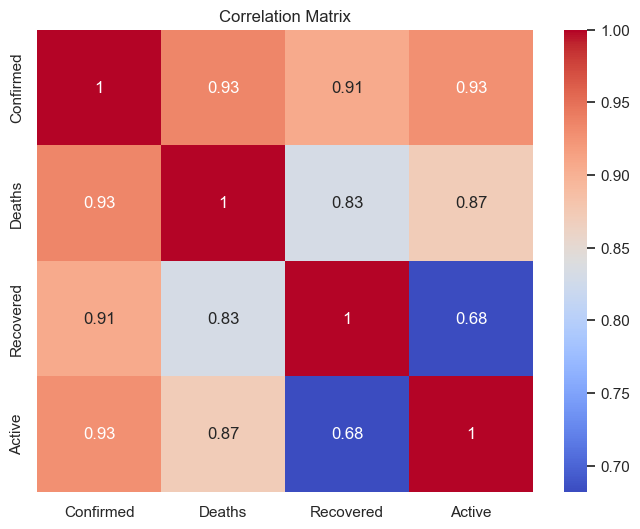

In [10]:
# Correlation Analysis

correlation = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

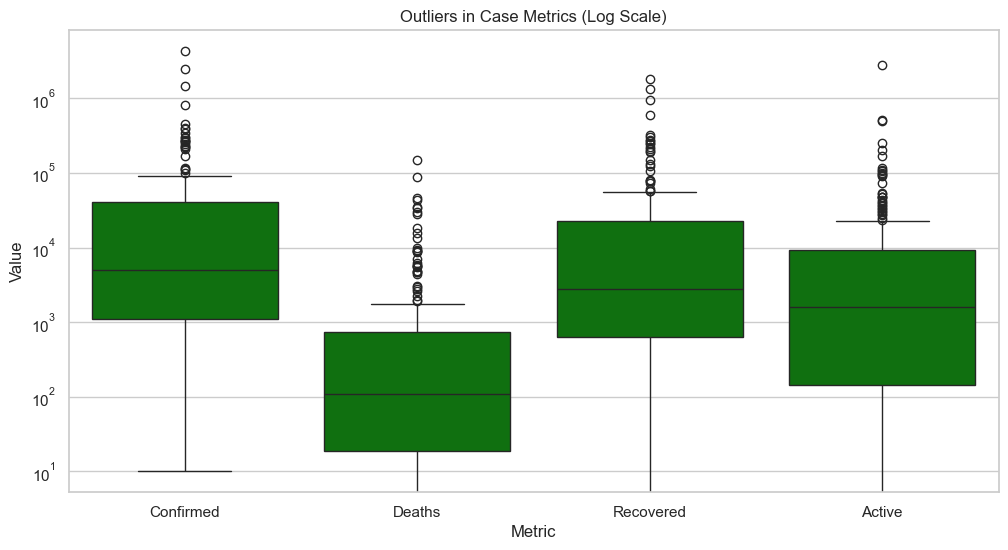

In [11]:
metrics = ['Confirmed', 'Deaths', 'Recovered','Active']

plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars='Country/Region', value_vars=metrics, var_name='Metric', value_name='Value')
sns.boxplot(data=df_melted, x='Metric', y='Value', color='Green')
plt.yscale('log')  # Log scale to handle outliers
plt.title('Outliers in Case Metrics (Log Scale)')
plt.show()

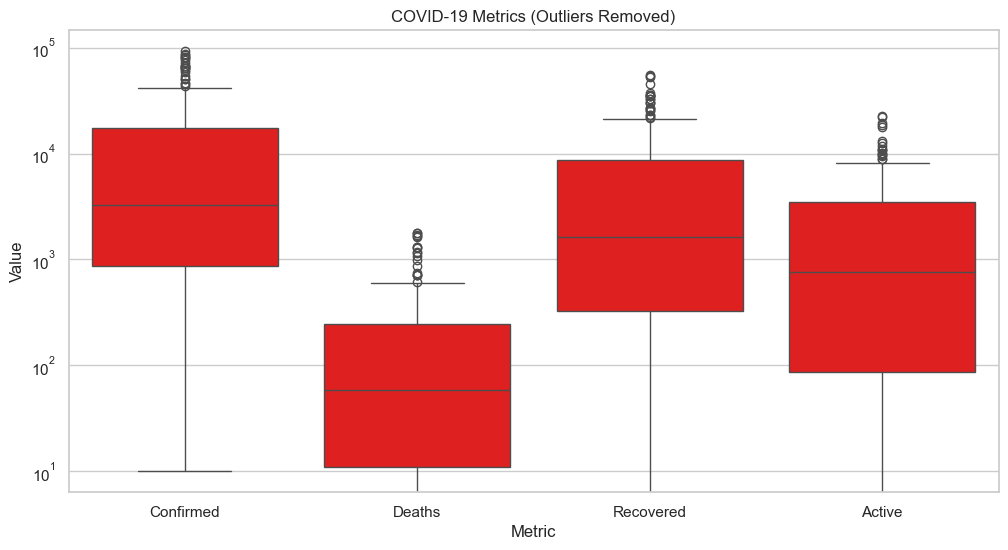

In [12]:
def remove_outliers(df):
    filtered_df = pd.DataFrame()
    for metric in df['Metric'].unique():
        subset = df[df['Metric'] == metric]
        Q1 = subset['Value'].quantile(0.25)
        Q3 = subset['Value'].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        cleaned = subset[(subset['Value'] >= lower) & (subset['Value'] <= upper)]
        filtered_df = pd.concat([filtered_df, cleaned], axis=0)
    return filtered_df


df_cleaned = remove_outliers(df_melted)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Metric', y='Value', color='red')
plt.yscale('log')  # Optional: log scale
plt.title('COVID-19 Metrics (Outliers Removed)')
plt.show()


In [13]:
df1=pd.read_csv("covid_19_clean_complete.csv")
df1.head(15)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [14]:
df1.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [15]:
df1.shape

(49068, 10)

In [16]:
df1['Province/State'].fillna('Unknown', inplace=True)

In [17]:
df1.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [18]:
df1.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Unknown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Unknown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Unknown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Unknown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Unknown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,Unknown,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,Unknown,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,Unknown,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [19]:
df2 = pd.read_csv("day_wise.csv")
df2.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [20]:
df2.isnull().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [21]:
df3= pd.read_csv("full_grouped.csv")
df3.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [22]:
df3.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [23]:
df4= pd.read_csv("usa_country_wise.csv")
df4.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [24]:
df4.isnull().sum()

UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64

In [25]:
df4['FIPS'].fillna('Mean', inplace=True)
df4['Admin2'].fillna('Unknown', inplace=True)

In [26]:
df4.isnull().sum()

UID               0
iso2              0
iso3              0
code3             0
FIPS              0
Admin2            0
Province_State    0
Country_Region    0
Lat               0
Long_             0
Combined_Key      0
Date              0
Confirmed         0
Deaths            0
dtype: int64

In [27]:
df5= pd.read_csv("worldometer_data.csv")
df5.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [28]:
df5.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [29]:
df5.fillna({
    'Continent': 0,
    'Population': 0,
    'NewCases': 'Unknown',
    'TotalDeaths': df5['TotalDeaths'].mean(),
    'NewDeaths': 'Unknown',
    'TotalRecovered': df5['TotalRecovered'].mean(),
    'NewRecovered': 'Unknown',
    'ActiveCases': df5['ActiveCases'].mean(),
    'Serious,Critical': df5['Serious,Critical'].mean(),
    'Tot Cases/1M pop': 0,
    'Deaths/1M pop': df5['Deaths/1M pop'].mean(),
    'TotalTests': df5['TotalTests'].mean(),
    'Tests/1M pop': df5['Tests/1M pop'].mean(),
    'WHO Region': 'Unknown'
}, inplace=True)


In [30]:
df5.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64